<a href="https://colab.research.google.com/github/AbhishekThakur0126/Job_Scrapper/blob/main/Final_Numerical_Programming_in_Python_Job_Scrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






## **GitHub Link -** https://github.com/AbhishekThakur0126/Job_Scrapper/tree/main

## **Project Summary:**

This Python script is an automated web scraping project designed to gather job postings from the TimesJobs website for the title "Python Developer." This project shows you how to parse HTML content using BeautifulSoup, send HTTP GET queries using the requests package, and arrange the retrieved data into an organized format using pandas. It retrieves essential information from every job posting, including the firm name, necessary qualifications, years of experience, location, job description, and a direct link to the posting, by looping through several search result pages. After that, the gathered data is saved to a CSV file and placed in a Pandas DataFrame for additional examination or use.

## **Explanation:**

The goal of this Python web scraping project is to automate the process of obtaining job postings from the TimesJobs website for the title "Python Developer." The project shows how to use a variety of Python tools to gather data step-by-step from an online source.


1. Import Necessary Libraries:
   - The script begins by importing the required Python libraries: requests, BeautifulSoup, and pandas.

2. Set the Base URL and Search Parameters:
   - The base URL for the TimesJobs website is defined as "https://www.timesjobs.com/candidate/job-search.html."
   - A dictionary named "parameters" is used to store the search parameters. These parameters include search type, search keywords (e.g., "Python Developer"), location (e.g., "India"), and the initial page number (startPage).

3. Create an Empty List for Job Data:
   - An empty list named "jobs_data1" is created to store the scraped job data.

4. Scrape Data from Multiple Pages:
   - The script enters a loop to scrape data from multiple search result pages. It continues scraping until the "startPage" parameter exceeds the "sequence" parameter, which determines the number of pages to scrape.

5. Send an HTTP GET Request:
   - Inside the loop, an HTTP GET request is sent to the TimesJobs website with the specified parameters using the requests library.

6. Parse HTML Content:
   - The HTML content of the response is parsed using BeautifulSoup with the 'lxml' parser.

7. Find Job Listings:
   - Job listings are identified by finding HTML elements with the class 'clearfix job-bx wht-shd-bx.'

8. Extract Job Data:
   - For each job listing, relevant information is extracted and stored in a dictionary named "data," including the company name, required skills, years of experience, location(s), job description, and a link to the job posting.

9. Append Data to the List:
   - The "data" dictionary is appended to the "jobs_data1" list for each job listing found on the page.

10. Increment the Page Parameter:
    - The "startPage" parameter is incremented to move to the next page of search results.

11. Create a Pandas DataFrame:
    - Once all the job data has been collected, a Pandas DataFrame is created from the "jobs_data1" list.

12. Save Data to a CSV File:
    - The DataFrame is saved to a CSV file named "job_listings10.csv," excluding the index column.


This project illustrates how to use Python to scrape job listings from websites, parse the HTML text, extract relevant data, and store it in an organized manner. In addition to offering a framework for comparable data extraction operations from other websites, it presents a useful use case of web scraping for employment-related information.

Implementin web scrapping on [Timesjobs.com](https://www.timesjobs.com/)

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_jobs(url, keywords, location, sequence, output_filename):
    # Define search parameters for TimesJobs website
    search_params = {
        'searchType': 'personalizedSearch',
        'from': 'submit',
        'luceneResultSize': 50,  # Number of items per page
        'txtKeywords': keywords,  # Keywords to search for
        'txtLocation': location,  # Location for the search
        'sequence': sequence,  # Number of pages to scrape
        'startPage': 1  # Start page for scraping
    }

    jobs_data = []  # Initialize an empty list to store job data

    while search_params['startPage'] <= search_params['sequence']:
        # Send an HTTP GET request to the TimesJobs website with the search parameters
        response = requests.get(url, params=search_params)
        soup = BeautifulSoup(response.text, 'lxml')  # Parse the response with BeautifulSoup
        jobs = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')  # Find job listings on the page

        if not jobs:
            break  # If no job listings are found, exit the loop

        for job in jobs:
            data = {}  # Create a dictionary to store job data
            data['Company'] = job.find('h3', class_='joblist-comp-name').get_text(strip=True)  # Extract company name
            data['Skills'] = job.find('span', class_='srp-skills').get_text(strip=True)  # Extract required skills

            ul = job.find('ul', class_='top-jd-dtl clearfix').findChildren(recursive=False)
            data['Exp'] = ul[0].find(text=True, recursive=False)  # Extract job experience

            data['Location(s)'] = ul[1].span.text if ul[1].span else None  # Extract job location(s)

            ul1 = job.find('ul', class_='list-job-dtl clearfix').findChildren(recursive=False)
            data['Desc'] = ul1[0].find('label').next_sibling.strip()  # Extract job description

            data['link'] = job.header.h2.a['href']  # Extract job link
            jobs_data.append(data)  # Append the extracted job data to the list

        search_params['startPage'] += 1  # Increment the startPage parameter to scrape the next page

    df = pd.DataFrame(jobs_data)  # Create a Pandas DataFrame from the scraped job data

    # Save the DataFrame to a CSV file, excluding the index column
    df.to_csv(output_filename, index=False)

    return df  # Return the DataFrame containing the scraped job data

In [2]:
# calling the function to scrape jobs and save to a CSV file
df = scrape_jobs("https://www.timesjobs.com/candidate/job-search.html", "Python Developer", "India", 3, "job_listings10.csv")

<ipython-input-1-5e143bb843df>:34: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  data['Exp'] = ul[0].find(text=True, recursive=False)  # Extract job experience


In [3]:
df

,Company,Skills,Exp,Location(s),Desc,link
0,anicalls pty ltd,"jms , junit , ibm os / mvs , ims ,...",5 - 8 yrs,Mumbai,Industry: ITTotal Positions: 2Job Type: Full T...,https://www.timesjobs.com/job-detail/senior-py...
1,anicalls pty ltd,"aws / azure , ci / cd , jenkins / ...",8 - 12 yrs,Hyderabad/Secunderabad,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/python-de...
2,anicalls pty ltd,"aws / azure , ci / cd , jenkins / ...",8 - 12 yrs,Hyderabad/Secunderabad,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/python-de...
3,anicalls pty ltd,"aws , azure , ci / cd , jenkins , ...",8 - 12 yrs,Chennai,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/devops-py...
4,anicalls pty ltd,"aws , azure , ci / cd , jenkins , ...",8 - 12 yrs,Chennai,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/devops-py...
...,...,...,...,...,...,...
130,TandA HR Solutions,"tdd , bdd , git ,python, restful apis...",3 - 6 yrs,Panchkula,Opening for Python Developer profile for an IT...,https://www.timesjobs.com/job-detail/opening-f...
131,TandA HR Solutions,"python, front end technologies ,pythonweb f...",3 - 8 yrs,Chandigarh,Urgent opening for the Python Developer profil...,https://www.timesjobs.com/job-detail/urgent-op...
132,TandA HR Solutions,"python, front end technologies ,pythonweb f...",3 - 8 yrs,Chandigarh,Urgent opening for the Python Developer profil...,https://www.timesjobs.com/job-detail/urgent-op...
133,Nutanix,"pythonprogramming , automation , web t...",8 - 11 yrs,Bengaluru / Bangalore,SMTS - Cloud and Virtualisation Computers / So...,https://www.timesjobs.com/job-detail/smts-clou...


In [4]:
#lets check the summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      135 non-null    object
 1   Skills       135 non-null    object
 2   Exp          135 non-null    object
 3   Location(s)  135 non-null    object
 4   Desc         135 non-null    object
 5   link         135 non-null    object
dtypes: object(6)
memory usage: 6.5+ KB


## **Data cleanning**

**Checking Null Values if Any**

In [5]:
df.isnull().sum()

Company        0
Skills         0
Exp            0
Location(s)    0
Desc           0
link           0
dtype: int64

**No Null values present**

**There are multiple Job positions with the name of same company. That will count as duplicates , so we will be avoid dropping them**

## **Cleaning and formatting the 'Exp' column to extract numeric experience values.**

In [6]:
# Clean and format the 'Exp' column
df['Exp'] = df['Exp'].str.replace(' yrs', '').str.replace(' Yrs', '').str.replace('yr', '').str.replace('Yr', '').str.strip()
df['Exp'] = df['Exp'].str.extract(r'(\d+)').astype(float)

##**Cleaning and formatting the 'Location(s)' column to remove extra spaces.**

In [7]:
# Clean and format the 'Location(s)' column to remove extra spaces
df['Location(s)'] = df['Location(s)'].str.replace('\s+', ' ', regex=True).str.strip()

##**Cleaning and formatting the 'Skills' column by stripping extra whitespace.**

In [8]:
# Clean and format the 'Skills' column by stripping extra whitespace
df['Skills'] = df['Skills'].str.strip()

In [10]:
df.head(n = 30)

,Company,Skills,Exp,Location(s),Desc,link
0,anicalls pty ltd,"jms , junit , ibm os / mvs , ims ,...",5.0,Mumbai,Industry: ITTotal Positions: 2Job Type: Full T...,https://www.timesjobs.com/job-detail/senior-py...
1,anicalls pty ltd,"aws / azure , ci / cd , jenkins / ...",8.0,Hyderabad/Secunderabad,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/python-de...
2,anicalls pty ltd,"aws / azure , ci / cd , jenkins / ...",8.0,Hyderabad/Secunderabad,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/python-de...
3,anicalls pty ltd,"aws , azure , ci / cd , jenkins , ...",8.0,Chennai,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/devops-py...
4,anicalls pty ltd,"aws , azure , ci / cd , jenkins , ...",8.0,Chennai,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/devops-py...
5,anicalls pty ltd,"aws , azure , ci / cd , jenkins , ...",8.0,Mumbai,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/python-de...
6,anicalls pty ltd,"aws , azure , ci / cd , jenkins , ...",8.0,Mumbai,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/python-de...
7,anicalls pty ltd,"aws or azure , ci / cd , jenkins ,...",8.0,Bengaluru / Bangalore,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/devops-py...
8,anicalls pty ltd,"aws or azure , ci / cd , jenkins ,...",8.0,Bengaluru / Bangalore,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/devops-py...
9,INSPIRATION MANPOWER,"algorithms , orchestration , docker , se...",5.0,Bengaluru / Bangalore,Job RequirementWe are hiring!!- Python Develop...,https://www.timesjobs.com/job-detail/python-de...


## **Data is Cleaned now lets do some visualizations**

## **Data Visualization**

**Count of Job Listings by Company**

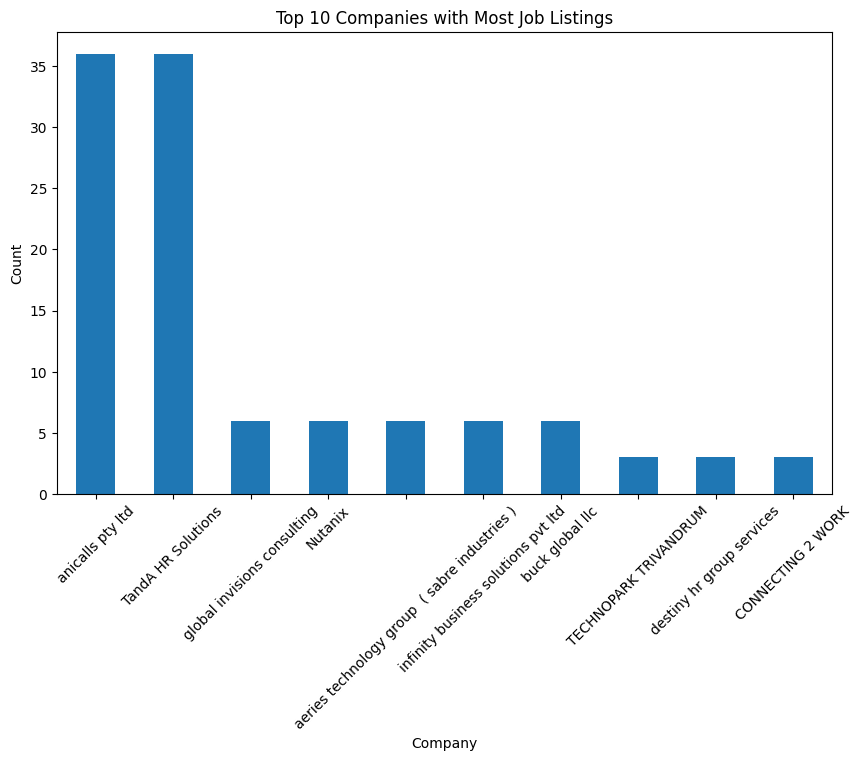

In [11]:
import matplotlib.pyplot as plt

# Count job listings by company
company_counts = df['Company'].value_counts()

# Plot the top 10 companies with the most job listings
top_10_companies = company_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_companies.plot(kind='bar')
plt.title('Top 10 Companies with Most Job Listings')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Observations:**:
* As you can see Anicalls pty ltd and Tanda HR solutions Hire very agressively .
* They look like  growing companies.

 **Job Experience Distribution**

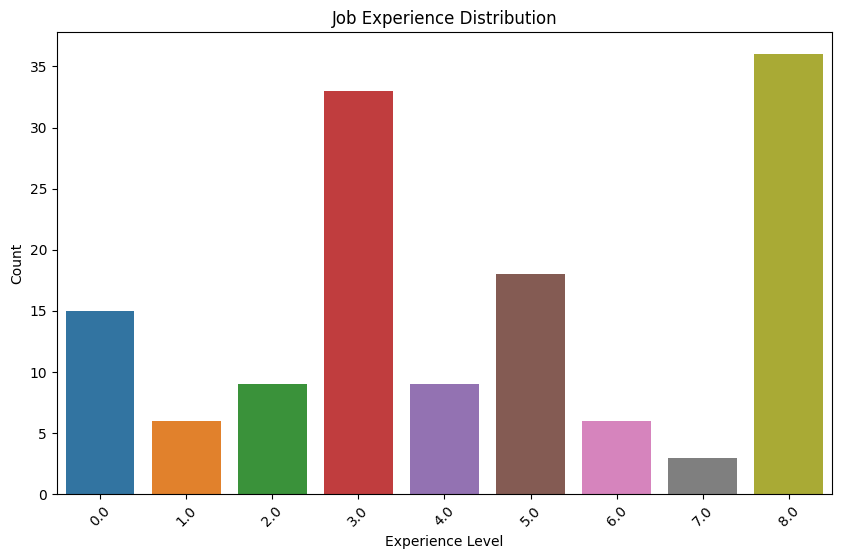

In [12]:
import seaborn as sns

# Plot the distribution of job experience levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Exp')
plt.title('Job Experience Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## **Observation:**
* There are plenty amount of jobs For Experience Python Developer In India.
* Even Freshers with 0 Experience have few jobs as well.

**Skills Required**

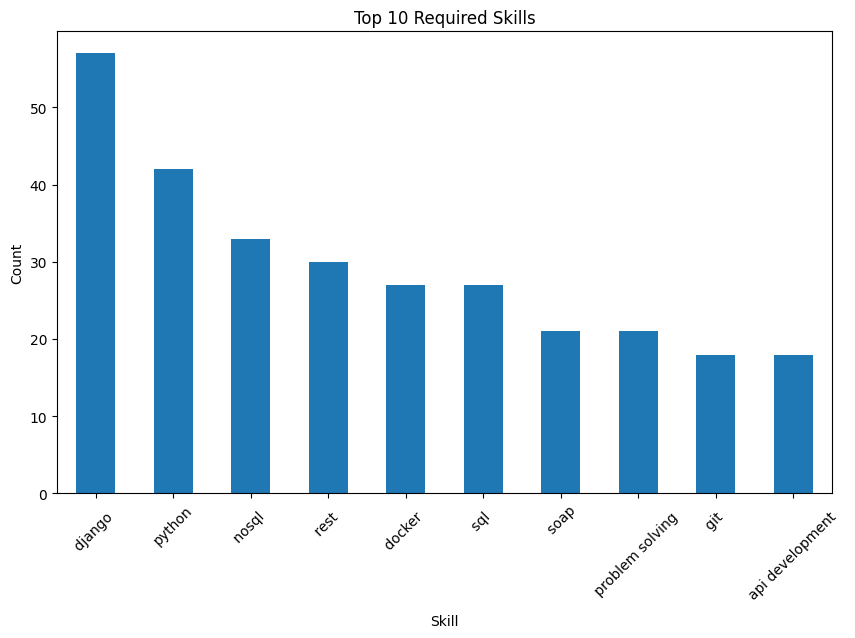

In [13]:
# Plot the most common skills required
skills_counts = df['Skills'].str.split(', ').explode().value_counts()

# Plot the top 10 skills
top_10_skills = skills_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_skills.plot(kind='bar')
plt.title('Top 10 Required Skills')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## **Observations:**
* For Python developer jobs these You need to have knowledge about django , python , rest , nosql , docker technologies because these are in demand skills and companies are hiring for these technology experts.

**Bar Plot of Top 10 Locations with Most Job Listings**

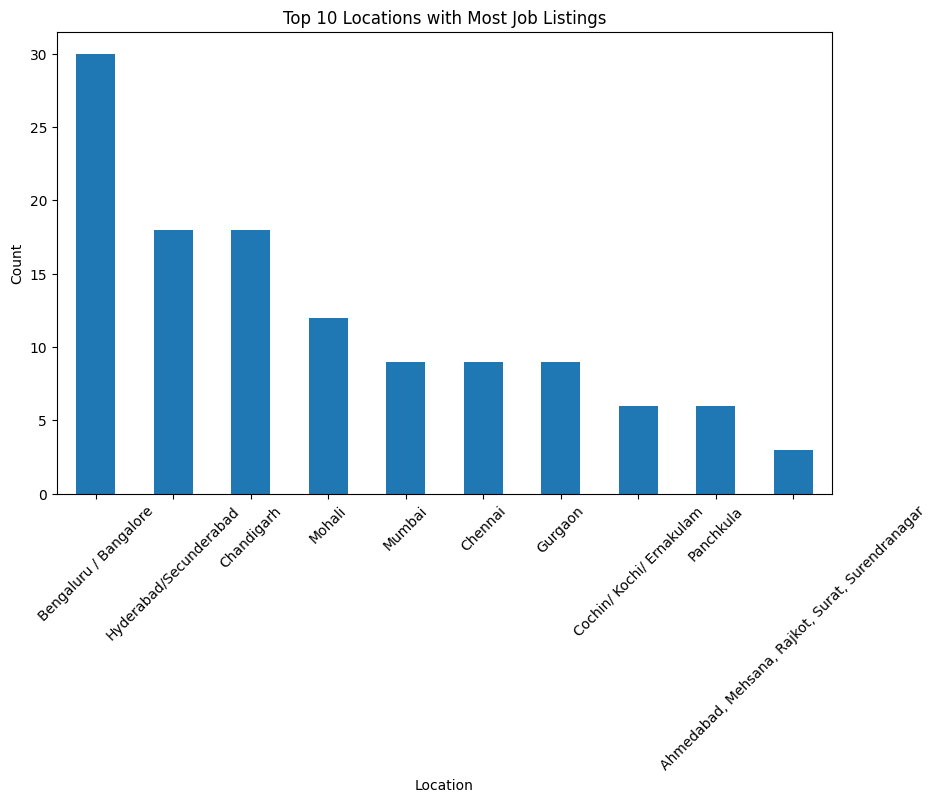

In [14]:
import matplotlib.pyplot as plt

# Count job listings by location
location_counts = df['Location(s)'].value_counts()

# Plot the top 10 locations with the most job listings
top_10_locations = location_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar')
plt.title('Top 10 Locations with Most Job Listings')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Observation:**
* Looking at Job locations most of these companies hire for Bengluru location.
* Many of them hire for Hydrabad and Chandigarh Locations.
* As expected because these are IT hubs of Our India.

**Word Cloud of Job Descriptions**

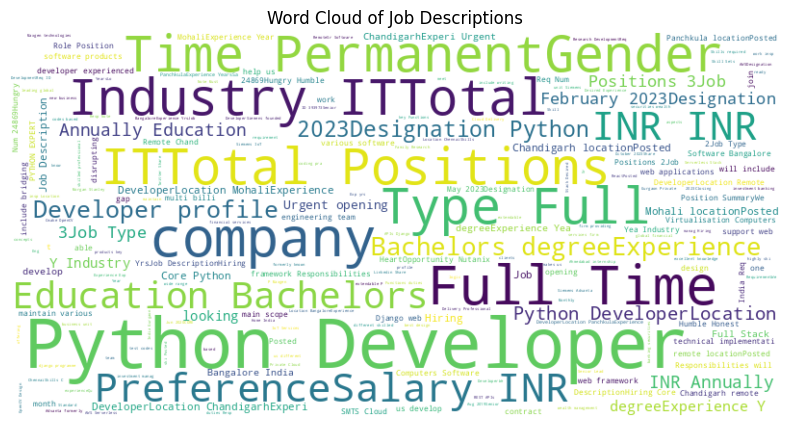

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all job descriptions into a single string
job_descriptions = " ".join(df['Desc'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_descriptions)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Job Descriptions')
plt.show()

## **Observation:**
*  This word cloud displays the most common words used in job descriptions, where the size of each word corresponds to its frequency.
*  If you add these words in your resume , there is really high chance you getting shortlisted through their ATS.

##**Conclusion:**

This web scraping project offers a useful illustration of how to use Python to gather job-related data from the TimesJobs website. It shows how to automate the data extraction process using well-known libraries like pandas, BeautifulSoup, and requests. The script is an adaptable tool for obtaining information from internet job portals since it can be changed to scrape job listings for various positions, areas, or further information. Because the retrieved data is structured, it may be easily analyzed or consulted for future research.